In [137]:
%pip install -r requirements.txt

INFO: pip is looking at multiple versions of imbalanced-learn to determine which version is compatible with other requirements. This could take a while.
  Using cached imbalanced_learn-0.10.1-py3-none-any.whl (226 kB)
INFO: pip is looking at multiple versions of xgboost to determine which version is compatible with other requirements. This could take a while.
  Using cached xgboost-1.7.3-py3-none-win_amd64.whl (89.1 MB)
INFO: pip is looking at multiple versions of <Python from Requires-Python> to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of scikit-learn to determine which version is compatible with other requirements. This could take a while.
  Using cached scikit_learn-1.2.0-cp310-cp310-win_amd64.whl (8.2 MB)
INFO: pip is looking at multiple versions of matplotlib to determine which version is compatible with other requirements. This could take a while.
  Using cached matplotlib-3.5.2-cp310-cp310-w

ERROR: Cannot install -r requirements.txt (line 7) and xgboost==1.7.3 because these package versions have conflicting dependencies.
ERROR: ResolutionImpossible: for help visit https://pip.pypa.io/en/latest/topics/dependency-resolution/#dealing-with-dependency-conflicts


# Latam Data Scientist Challenge

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime,date,timedelta,time

In [2]:
def get_data(filename):
    """Get data from the challenge csv file.

    Args:
        filename (str): location of the file
    """
    data = pd.read_csv(filename,infer_datetime_format=True,low_memory=False)
    data['Fecha-I'] = pd.to_datetime(data['Fecha-I'])
    data['Fecha-O'] = pd.to_datetime(data['Fecha-O'])

    return data

In [3]:
# Load data
df = get_data('dataset_SCL.csv')
df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


In [4]:
df.isna().sum()

Fecha-I      0
Vlo-I        0
Ori-I        0
Des-I        0
Emp-I        0
Fecha-O      0
Vlo-O        1
Ori-O        0
Des-O        0
Emp-O        0
DIA          0
MES          0
AÑO          0
DIANOM       0
TIPOVUELO    0
OPERA        0
SIGLAORI     0
SIGLADES     0
dtype: int64

In [5]:
df.dtypes

Fecha-I      datetime64[ns]
Vlo-I                object
Ori-I                object
Des-I                object
Emp-I                object
Fecha-O      datetime64[ns]
Vlo-O                object
Ori-O                object
Des-O                object
Emp-O                object
DIA                   int64
MES                   int64
AÑO                   int64
DIANOM               object
TIPOVUELO            object
OPERA                object
SIGLAORI             object
SIGLADES             object
dtype: object

In [6]:
#Fix the missing value by simply inspection

msk_na = df[df['Vlo-O'].isna()].index

df.loc[msk_na,'Vlo-O'] = df.loc[msk_na,'Vlo-I']

## Question 1: How is the data distributed? Did you find any noteworthy insight to share? What can you conclude about this?

In [7]:
#Count of unique values by feature
df.nunique()

Fecha-I      53252
Vlo-I          584
Ori-I            1
Des-I           64
Emp-I           30
Fecha-O      62774
Vlo-O          861
Ori-O            1
Des-O           63
Emp-O           32
DIA             31
MES             12
AÑO              2
DIANOM           7
TIPOVUELO        2
OPERA           23
SIGLAORI         1
SIGLADES        62
dtype: int64

In [8]:
# All flights are from Santiago
df['SIGLAORI'].unique()

array(['Santiago'], dtype=object)

In [9]:
#Count values by DIANOM and TIPOVUELO
print(df.groupby('DIANOM').DIANOM.count())
print(df.groupby('TIPOVUELO').TIPOVUELO.count())

DIANOM
Domingo       9796
Jueves       10251
Lunes        10131
Martes        9662
Miercoles     9722
Sabado        8352
Viernes      10292
Name: DIANOM, dtype: int64
TIPOVUELO
I    31240
N    36966
Name: TIPOVUELO, dtype: int64


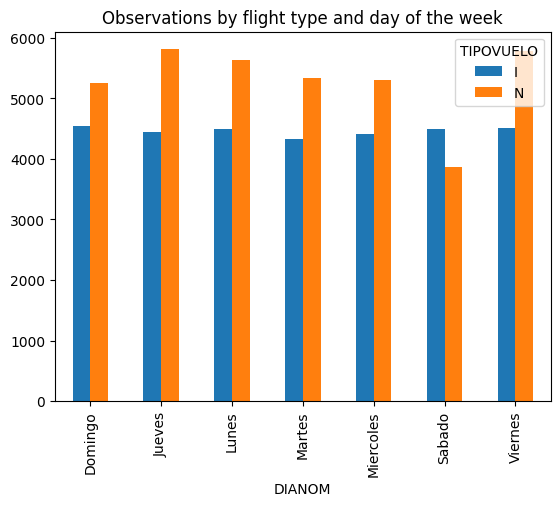

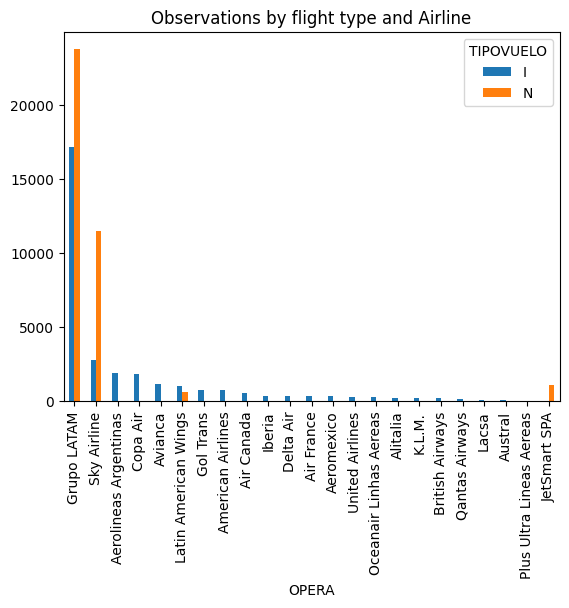

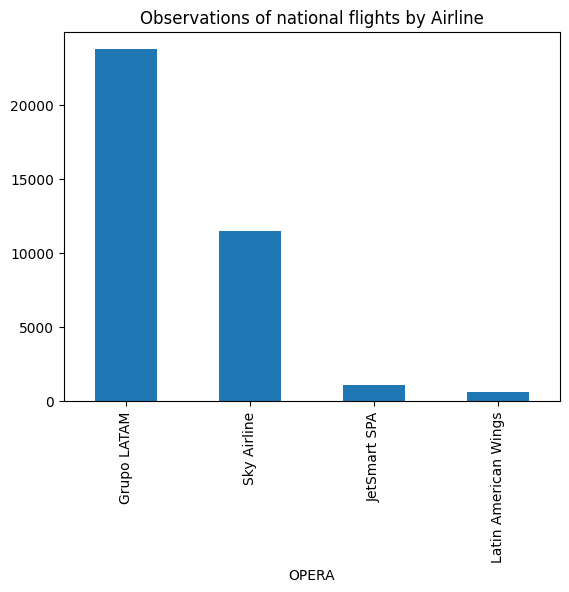

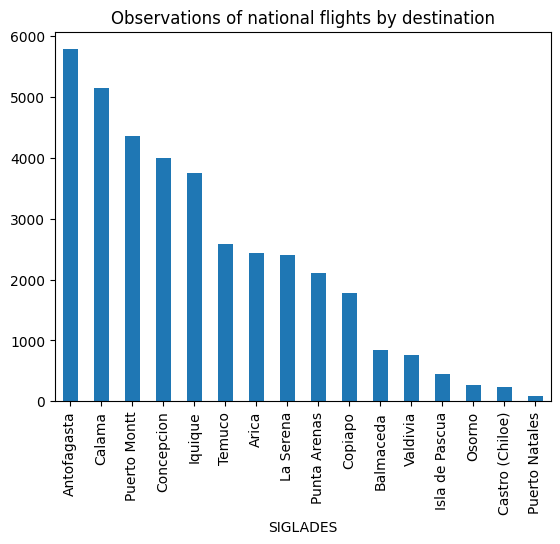

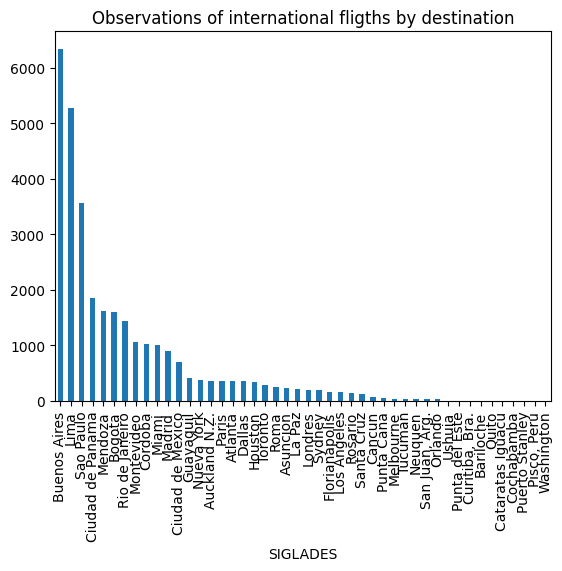

In [10]:
%matplotlib inline
df.groupby(['TIPOVUELO','DIANOM']).count().iloc[:,0].unstack(level=0).plot(kind='bar',title='Observations by flight type and day of the week')
plt.show()
df.groupby(['TIPOVUELO','OPERA']).count().iloc[:,0].unstack(level=0).sort_values(by='I',ascending=False).plot(kind='bar',title='Observations by flight type and Airline')
plt.show()
df.query("TIPOVUELO == 'N'").groupby(['OPERA']).count().iloc[:,0].sort_values(ascending=False).plot(kind='bar',title='Observations of national flights by Airline')
plt.show()
df.query("TIPOVUELO == 'N'").groupby('SIGLADES').count().iloc[:,0].sort_values(ascending=False).plot(kind='bar',title='Observations of national flights by destination')
plt.show()
df.query("TIPOVUELO == 'I'").groupby('SIGLADES').count().iloc[:,0].sort_values(ascending=False).plot(kind='bar',title='Observations of international fligths by destination')
plt.show()

In [11]:
prop_N_dest = df.query("TIPOVUELO == 'N'")['SIGLADES'].value_counts(normalize = True)
prop_N_dest = prop_N_dest.cumsum()
prop_N_dest = prop_N_dest.reset_index(drop=True)
prop_N_dest

0     0.156522
1     0.295731
2     0.413596
3     0.521614
4     0.622978
5     0.693015
6     0.758914
7     0.824109
8     0.881053
9     0.929205
10    0.951902
11    0.972272
12    0.984499
13    0.991506
14    0.997863
15    1.000000
Name: SIGLADES, dtype: float64

In [12]:
prop_I_dest = df.query("TIPOVUELO == 'I'")['SIGLADES'].value_counts(normalize = True)
prop_I_dest = prop_I_dest.cumsum()
prop_I_dest = prop_I_dest.reset_index(drop=True)
prop_I_dest.head(20)

0     0.202785
1     0.371479
2     0.485723
3     0.544942
4     0.596959
5     0.648303
6     0.694238
7     0.728361
8     0.761108
9     0.793630
10    0.822247
11    0.844654
12    0.858163
13    0.870391
14    0.881946
15    0.893438
16    0.904898
17    0.916325
18    0.927017
19    0.936076
Name: SIGLADES, dtype: float64

In [13]:
prop_tot_dest = df['SIGLADES'].value_counts(normalize = True)
prop_tot_dest = prop_tot_dest.cumsum()
prop_tot_dest = prop_tot_dest.reset_index(drop=True)
prop_tot_dest.head(20)

0     0.092880
1     0.177712
2     0.254978
3     0.330425
4     0.394305
5     0.452849
6     0.507785
7     0.560112
8     0.598071
9     0.633786
10    0.669120
11    0.699982
12    0.727106
13    0.753204
14    0.777028
15    0.800545
16    0.821585
17    0.837214
18    0.852212
19    0.867108
Name: SIGLADES, dtype: float64

Text(0.5, 1.0, 'Cummulative proportion by number of destinations')

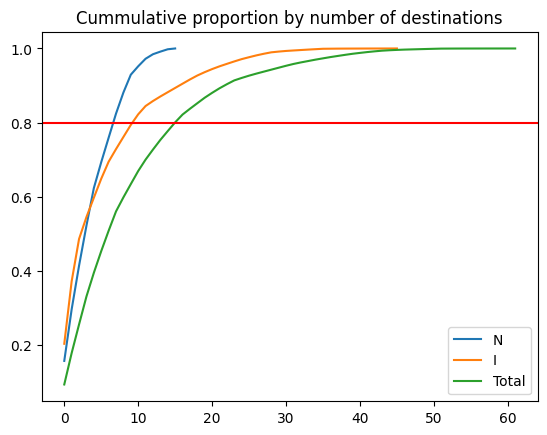

In [14]:
prop_N_dest.plot()
prop_I_dest.plot()
prop_tot_dest.plot()
plt.axhline(y=0.8, color='r', linestyle='-')
plt.legend(['N','I','Total'])
plt.title('Cummulative proportion by number of destinations')

Text(0.5, 1.0, 'Different destinations by Airline')

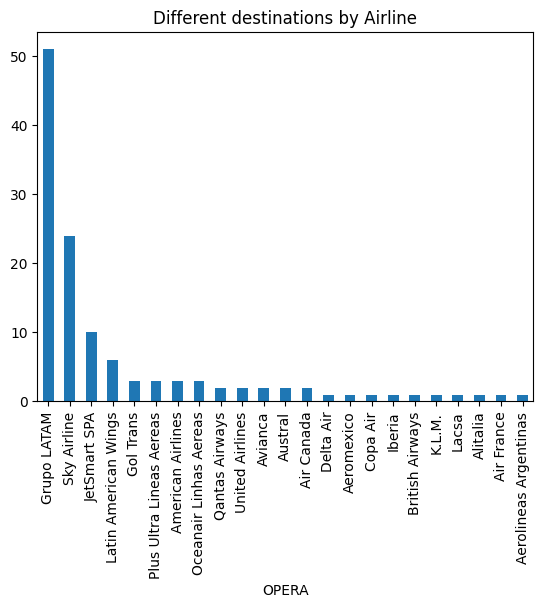

In [15]:
df.groupby('OPERA').nunique()['SIGLADES'].sort_values(ascending=False).plot(kind='bar')
plt.title('Different destinations by Airline')

Text(0.5, 1.0, 'Number of different airlines flying to a single destination')

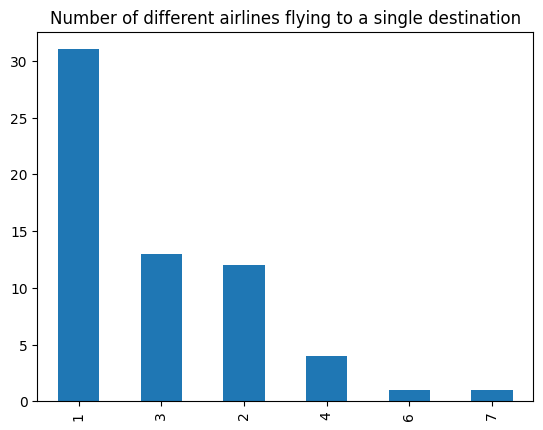

In [16]:
df.groupby('SIGLADES').nunique()['OPERA'].value_counts().sort_values(ascending=False).plot(kind='bar')
plt.title('Number of different airlines flying to a single destination')

There are 23 different airlines performing flights from Santiago. Only 4 of them operate national destinations flights. Grupo LATAM is the company that concentrates the majority in both cases: national and international flights from SCL, followed by Sky Airline.

There is a similar distribution through the day of week of the flights.

In the case of domestic flights, the destinations Antofagasta, Calama, Puerto Montt, Concepción and Iquique appear mainly, while in the case of international flights, the majority are flights in Latin America such as Buenos Aires, Lima, Sao Paulo, Ciudad de Panama, Mendoza, Bogota and Rio de Janeiro.

Airlines that perform national flights are the ones that present more different destinations, while airlines that perform international flights perform less than 4 different destinations.

About the proportion of total flights:
* 7 destinations of national fligths concentrates more than the 80% of the national fligths.
* 10 destination of international flights concentrates more than the 80% of the internationl fliths.
* 15 unique destinations of all flights from Santiago concentrates the 80% of the total flights.



## Question 2: Generate the following additional columns. Please export them to a CSV file named synthetic_features.csv

In [17]:
# This piece of code considers until one day ahead, with the purpose that include all flights inside the last day. This is because the default time is 00:00.

df['high_season'] = 1*1*((df['Fecha-I'].between(datetime(2017,12,15),datetime(2017,3,4))) | (df['Fecha-I'].between(datetime(2017,7,15),datetime(2017,8,1))) | (df['Fecha-I'].between(datetime(2017,9,11),datetime(2017,10,1))))
df['min_diff'] = (df['Fecha-O']-df['Fecha-I'])/np.timedelta64(1, 'm')
df['delay_15'] = 1*(df['min_diff']>15)
df['period_day'] = ["morning" if time(5,0,0) <= x.time() <=time(11,59,59) else "afternoon" 
                    if time(12,0,0) <= x.time() <= time(18,59,59) else "night" for x in df['Fecha-I']]

In [18]:
columnas_synt = ['high_season','min_diff','delay_15','period_day']
df[columnas_synt].to_csv('synthetic_features.csv')

## Question 3: What is the behavior of the delay rate across destination, airline, month of the year, day of the week, season, type of flight? What variables would you expect to have the most influence in predicting delays?

In [19]:
mean_all_dataset = df.delay_15.mean()
np.round(mean_all_dataset*100,2)

18.49

In [20]:
#Destination
destination_rate = df.groupby('SIGLADES').mean().delay_15

#Airline
airline_rate = df.groupby('OPERA').mean().delay_15 

#Month of the year
month_rate = df.groupby('MES').mean().delay_15

#Day of the week
weekday_rate =  df.groupby('DIANOM').mean().delay_15 

#Season
season_rate = df.groupby('high_season').mean().delay_15 

#Type of flight
typeflight_rate = df.groupby('TIPOVUELO').mean().delay_15 

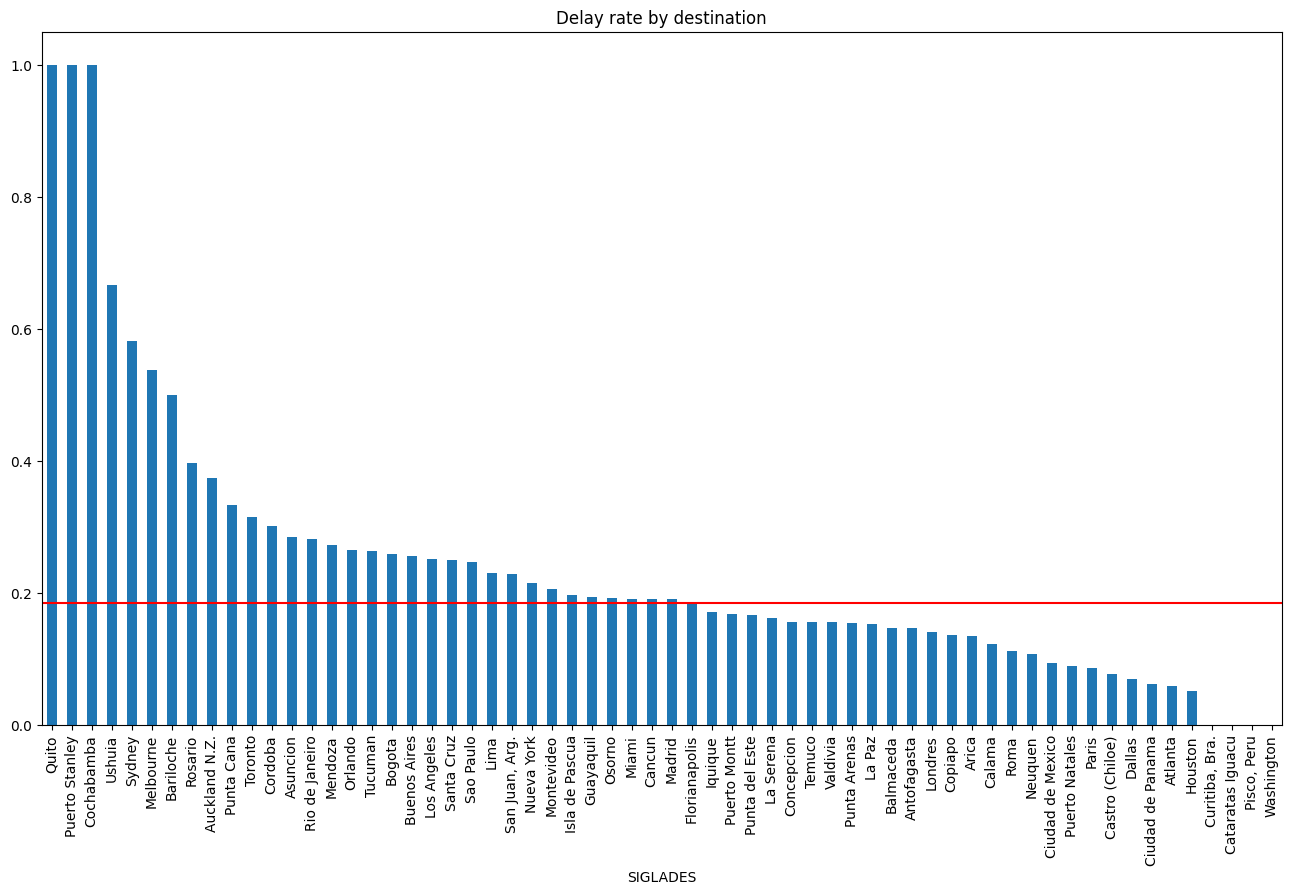

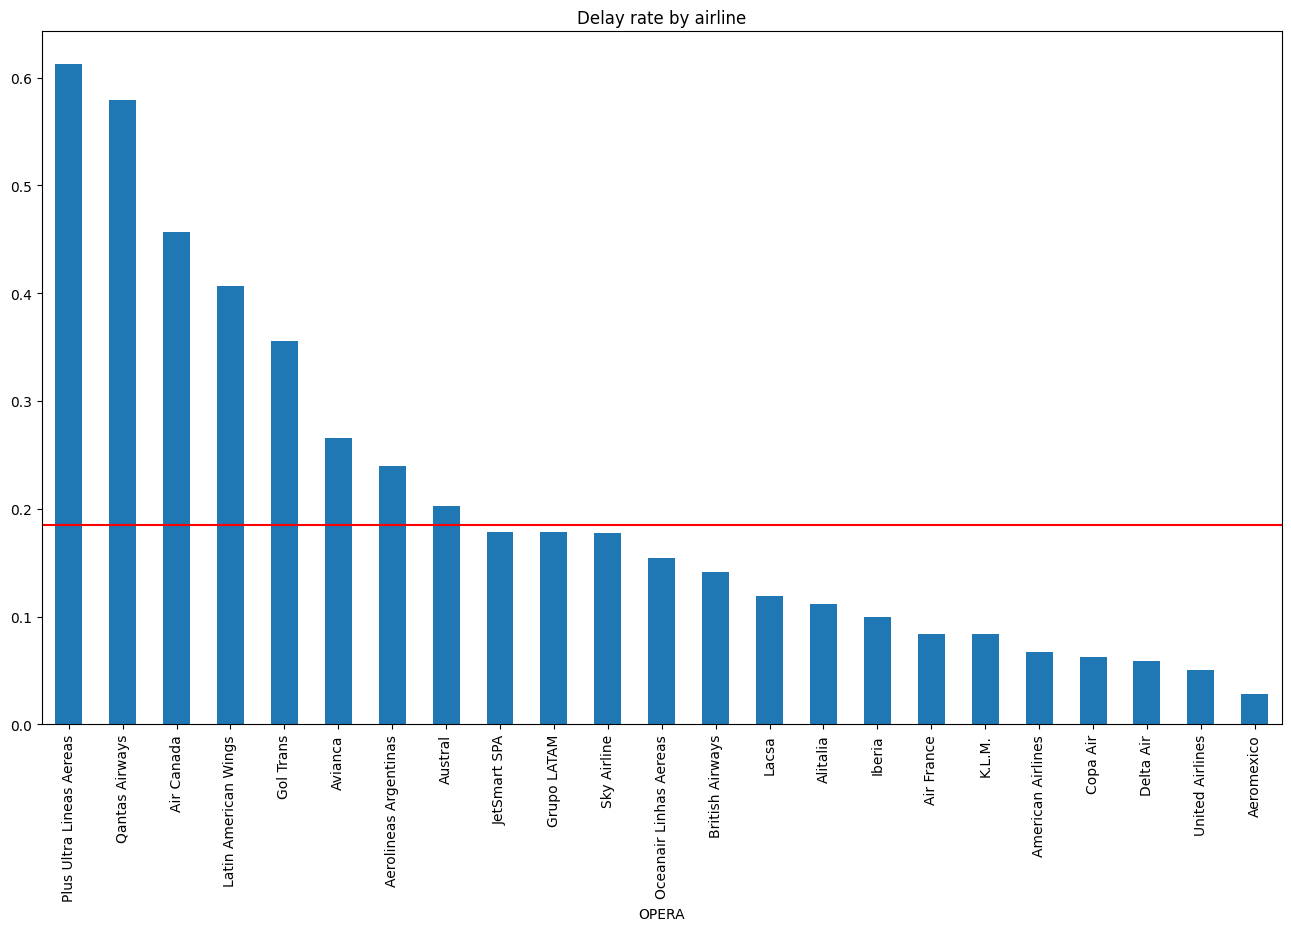

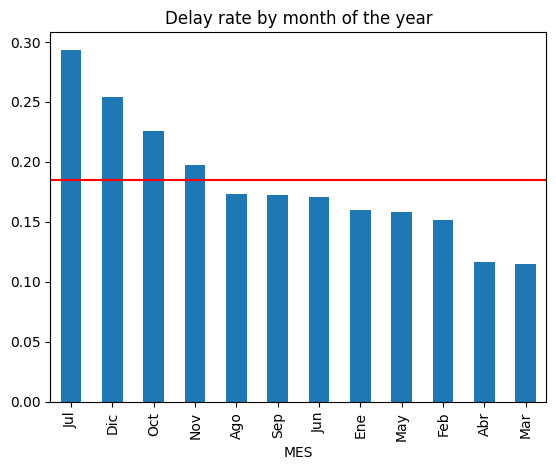

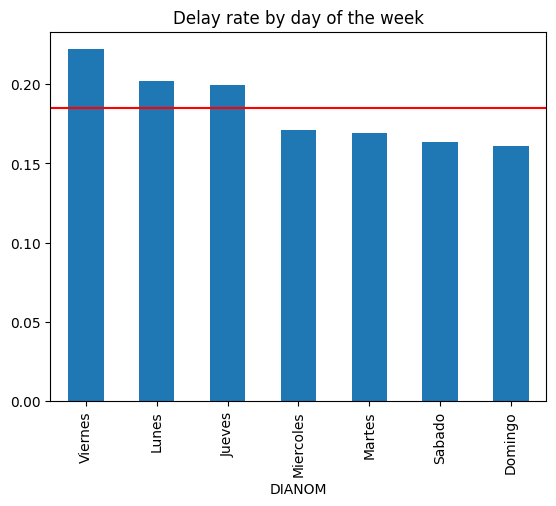

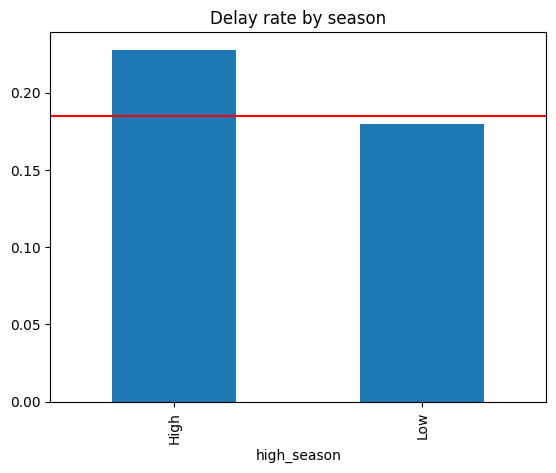

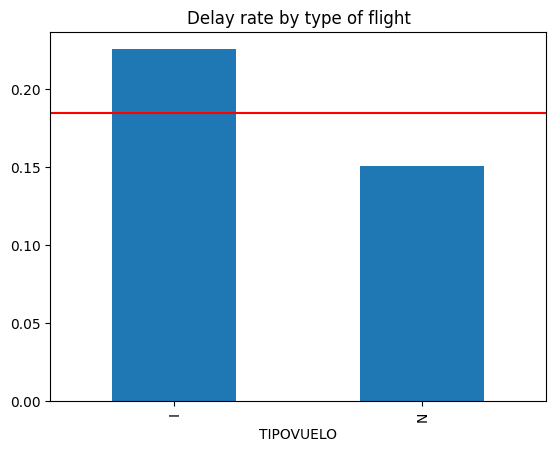

In [21]:
#Composición de la tasa de atraso por categorías

dict_mes = {1:'Ene',2:'Feb',3:'Mar',4:'Abr',5:'May',6:'Jun',7:'Jul',8:'Ago',9:'Sep',10:'Oct',11:'Nov',12:'Dic'}
dict_season = {0:'Low',1:'High'}

destination_rate.sort_values(ascending=False).plot(kind='bar',figsize=(16,9),title="Delay rate by destination")
plt.axhline(y=mean_all_dataset,color='r')
plt.show()
airline_rate.sort_values(ascending=False).plot(kind='bar',figsize=(16,9),title="Delay rate by airline")
plt.axhline(y=mean_all_dataset,color='r')
plt.show()
month_rate.sort_values(ascending=False).rename(index=dict_mes).plot(kind='bar',title="Delay rate by month of the year")
plt.axhline(y=mean_all_dataset,color='r')
plt.show()
weekday_rate.sort_values(ascending=False).plot(kind='bar',title="Delay rate by day of the week")
plt.axhline(y=mean_all_dataset,color='r')
plt.show()
season_rate.sort_values(ascending=False).rename(index=dict_season).plot(kind='bar',title="Delay rate by season")
plt.axhline(y=mean_all_dataset,color='r')
plt.show()
typeflight_rate.sort_values(ascending=False).plot(kind='bar',title="Delay rate by type of flight")
plt.axhline(y=mean_all_dataset,color='r')
plt.show()

It would be expected that the variables that have the greatest correlation with the delay variable are the most suitable for predicting them. We can also assume that the variables that can explain greater variance, that is, that their behavior is also heterogeneous between classes, are more likely to better explain the delays.

In [22]:
destinations_100 = ['Quito', 'Puerto Stanley', 'Cochabamba']
destinations_0 = ['Curitiba, Bra.', 'Cataratas Iguacu', 'Pisco, Peru', 'Washington']

higher_dest_Oce = ['Sydney', 'Melbourne', 'Auckland N.Z.']
lower_dest_us = ['Houston','Atlanta','Dallas']

In [23]:
df['SIGLADES'].value_counts()[destinations_100]

Quito             2
Puerto Stanley    1
Cochabamba        1
Name: SIGLADES, dtype: int64

In [24]:
df['SIGLADES'].value_counts()[destinations_0]

Curitiba, Bra.      3
Cataratas Iguacu    2
Pisco, Peru         1
Washington          1
Name: SIGLADES, dtype: int64

In [25]:
df['SIGLADES'].value_counts()[higher_dest_Oce]

Sydney           194
Melbourne         39
Auckland N.Z.    361
Name: SIGLADES, dtype: int64

In [26]:
df['SIGLADES'].value_counts()[lower_dest_us]

Houston    334
Atlanta    358
Dallas     357
Name: SIGLADES, dtype: int64

About delay rate by destinations, we consider those which have 100% delays or 0%, but these instances are scarce. On the other hand, destinations to some zones of the world (diving into international flights) present more informative scenarios. Some Oceania destinations (Australia and N.Z) present high delay rates, and the amount of observations could be informative. In an opposite way, some US destinations, performs low delay rates.

About delay rate by Airline, seems to be a good feature to explain delays. If we focus attention on domestic flights, Latin American Wings present greater delay rate than the others airlines performing domestic flights and the mean_delay_rate. There are various airlines that has greater delay rate than the mean, and in the same way, lower delay rates by other ones. So, it represent heterogeity, in other words: good variance to explain.

About month distribution, it is seen that the months of December and July have higher late rates, it may be due to more instances and beginning of vacations in general. On the other hand, March and April, have lower delay rates, it can be due to the low season. This feature likely be informative.

About day of the week. Friday, Thursday and monday are characterized by the beggining or ending of the workweek. For this reason, it could be that they present higher delay rates compared to the rest of the week.

About the season. As it is seen that in case of the month features, the high season present higher delay rate than low season. However, this feature is in competition with the feature of the month. It is clear that they are collinear.

About the type of flight, it is seen that there is a difference, where domestic flights present lower delay rates.

In summary, airline and destination are very heterogeneous and might be informative. Type of flight is key to understand that domestic flight has lower delay rates. Day of the week, probably add explanatory power due to the seasonality of the week and laboral behavior. Finally, month and season are collinear, so only one of them add value to the variance explained, and the other can result in noisy.

## Question 4: Train one or several models (using the algorithm(s) of your choice) to estimate the likelihood of a flight delay. Feel free to generate additional variables and/or supplement with external variables.

In [27]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from imblearn.combine import SMOTEENN

In [28]:
#Source: https://www.ncei.noaa.gov/ 
weather_data = pd.read_csv('weather_data.csv', )[['DATE','PRCP','TAVG']]
weather_data['TAVG'] = weather_data.TAVG.ffill()
weather_data['PRCP'] = weather_data.PRCP.fillna(0)
weather_data.head()

,DATE,PRCP,TAVG
0,2017-01-01,0.00,71
1,2017-01-02,0.00,75
2,2017-01-03,0.00,71
3,2017-01-04,0.00,70
4,2017-01-05,0.00,74


In [29]:
df['DATE'] = df['Fecha-I'].apply(lambda x: x.date()).astype(str)
df = df.merge(weather_data,on='DATE',how='left')
df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,OPERA,SIGLAORI,SIGLADES,high_season,min_diff,delay_15,period_day,DATE,PRCP,TAVG
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,American Airlines,Santiago,Miami,0,3.00,0,night,2017-01-01,0.00,71
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,American Airlines,Santiago,Miami,0,9.00,0,night,2017-01-02,0.00,75
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,American Airlines,Santiago,Miami,0,9.00,0,night,2017-01-03,0.00,71
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,American Airlines,Santiago,Miami,0,3.00,0,night,2017-01-04,0.00,70
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,American Airlines,Santiago,Miami,0,-2.00,0,night,2017-01-05,0.00,74


In [30]:
#Match flight, destiantion, airline informed and operated. Plan vs operation.

df['coincide_vuelo'] = 1*(df['Vlo-I']==df['Vlo-O'])
df['coincide_destino'] = 1*(df['Des-I']==df['Des-O'])
df['coincide_aerolinea'] =1*(df['Emp-I']==df['Emp-O'])

In [31]:
exogs = ['DIANOM','TIPOVUELO','OPERA','SIGLADES','high_season','period_day','MES',
         'PRCP','TAVG','coincide_vuelo','coincide_destino','coincide_aerolinea']
one_hot_cols=['DIANOM','TIPOVUELO','OPERA','SIGLADES','high_season','period_day','MES']

target = 'delay_15'

X = df[exogs]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

encoder = OneHotEncoder(min_frequency=5, sparse_output = False, handle_unknown='ignore') 
encoder.fit(X_train)

X_train = pd.DataFrame(encoder.transform(X_train),columns=encoder.get_feature_names_out())
X_test = pd.DataFrame(encoder.transform(X_test),columns=encoder.get_feature_names_out())

In [32]:
#Under/OverSampling due to imbalanced problem.

smote_enn = SMOTEENN(random_state=0)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)

y_train_resampled.mean()

0.6511297665288394

It is seen that the imbalanced problem is resolved (due to the mean before was 18.5%)

In [ ]:
# clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
# models,predictions = clf.fit(X_train_resampled, X_test, y_train_resampled, y_test)
# models
#These lines exceed the processing time for the delivery, so we comment them and try only some classic models.

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

seed=1234
m1 = LogisticRegression(random_state=seed)
m2 = RandomForestClassifier(random_state=seed)
m3 = MLPClassifier(random_state=seed)

m1.fit(X_train_resampled,y_train_resampled)
m2.fit(X_train_resampled,y_train_resampled)
m3.fit(X_train_resampled,y_train_resampled)

y_hat1 = m1.predict(X_test)
y_hat2 = m2.predict(X_test)
y_hat3 = m3.predict(X_test)

## Question 5: Evaluate model performance in the predictive task across each model that you trained. Define and justify what metrics you used to assess model performance. Pick the best trained model and evaluate the following: What variables were the most influential in the prediction task? How could you improve the Performance?

For a classification problem is more suitable the f1-score (recall and precision balancing indicator), so we are interested to get the model with the best (higher) f1-score. In addition, in this case a balanced_accuracy measure, due to the imbalanced classes issue is also informative.

In [45]:
from sklearn.metrics import f1_score, balanced_accuracy_score, recall_score, precision_score, roc_auc_score

In [46]:
def performance_metrics(testy,yhat,name_model):
    """_summary_

    Args:
        testy (list or array): Test of the target variable.
        yhat (list or array): Model predictions.
        name_model (string): Name of the fitted model. (Just for index reference)

    Returns:
        pd.DataFrame: A dataframe with the main performance scores (ROC,Accuracy,Precision,Recall,f1score)
    """
    roc_auc = roc_auc_score(testy,yhat)
    bal_accuracy = balanced_accuracy_score(testy,yhat)
    precision = precision_score(testy,yhat)
    recall = recall_score(testy,yhat)
    f1score = f1_score(testy,yhat)

    df_metrics = pd.DataFrame({'ROC_AUC':roc_auc,'BAL_ACC':bal_accuracy,'Precision':precision,'Recall':recall,'F1_score':f1score},index=[name_model])
    return df_metrics

In [52]:
lr_metrics = performance_metrics(y_test,y_hat1,"LogisticRegression")
rf_metrics = performance_metrics(y_test,y_hat2,"RandomForest")
mlp_metrics = performance_metrics(y_test,y_hat3,"MLP_NN")

In [53]:
pd.concat([lr_metrics,rf_metrics,mlp_metrics])

,ROC_AUC,BAL_ACC,Precision,Recall,F1_score
LogisticRegression,0.61,0.61,0.24,0.82,0.37
RandomForest,0.65,0.65,0.29,0.66,0.40
MLP_NN,0.64,0.64,0.27,0.69,0.39


The best model of the trained models is the Random Forest, due to the higher indicators of F1_score and Balance accuracy.

Is straightforward look for the feature importance in a tree-based model, because the method is integrated in the model:

                     RF
PRCP               0.02
TAVG               0.02
OPERA              0.02
MES                0.02
DIANOM             0.02
SIGLADES           0.02
high_season        0.02
period_day         0.02
TIPOVUELO          0.02
coincide_destino   0.00
coincide_aerolinea 0.00
coincide_vuelo     0.00


<AxesSubplot:title={'center':'Feature importance by variable'}>

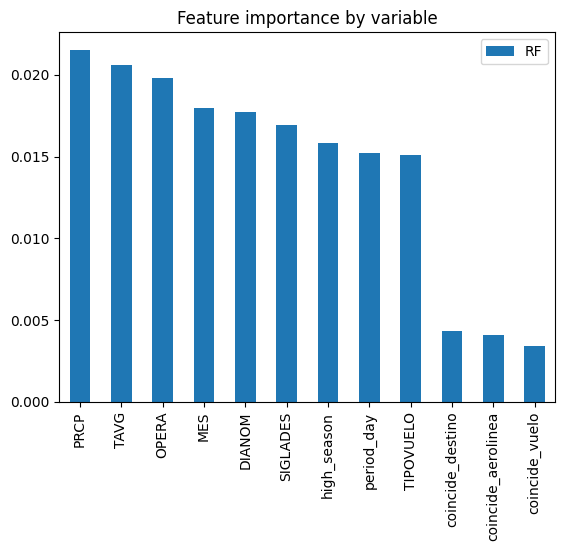

In [57]:
feat_imp = pd.DataFrame(dict(zip(exogs,m2.feature_importances_)),index=['RF'])
print(feat_imp.transpose().sort_values(by='RF',ascending=False))
feat_imp.transpose().sort_values(by='RF',ascending=False).plot(kind='bar',title='Feature importance by variable')

The meteorological features seems to add value to explain the delay of the flights. Followed by airline, month and day of the week.

Probably a better feature engineering can improve the results. A MRMR (Maximum relevance, minimum redundancy) method could be favorable for this purpose. In addition, a hyperparameter tuning for the selected models improve fitting performance. In this case, by the limited time, we do not run cross validation (with kfold or stratified k folds), and these can change the performance indicators.

Finally, due to a tree-based model was selected. It's worth it trying more models like XGBoost, LightGBM, ExtraTreesClassifier, with their respective hyperparameter tuning and cross validation.